# e/iso/sQTL and gene comparison
1. e/iso/sGene overlap
2. top e/iso/sQTL distance to TSS
3. QTL schematic
4. LD schematic
5. genes with xQTL

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(VennDiagram))
suppressMessages(library(UpSetR))
suppressMessages(library(ggsci))

# suppressMessages(library(ggridges))

In [2]:
setwd("~/project-gandalm/isoform_twas/")

### 1: e/iso/sGene (grouped permutation)

In [3]:
egene <- fread("eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
isogene <- fread("isoqtl_new/results/mixed_grp_perm_70hcp/group.perm.genes.txt.gz", data.table = F)
sgene <- fread("sqtl_new/results/mixed_grp_perm_40hcp_1e6/group.perm.genes.txt.gz", data.table = F)

In [4]:
isogene <- isogene %>% filter(qval < 0.05)
sgene <- sgene %>% filter(qval < 0.05)

In [15]:
head(isogene)
head(sgene)

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,ENST00000456328.2_1:ENSG00000223972,846,1.03391,153.810,472.615,2.77306e-04,chr1:935662,859173,14,14,...,1,9.17017e-05,0.0480143,0.01218360,0.03329670,0.03696810,ENSG00000223972,1,0.03795780,0.000388848
2,ENST00000471248.1_4:ENSG00000238009,1348,1.04404,773.424,485.930,2.47930e-05,rs1574243,707362,312,376,...,1,7.67478e-06,-0.0123557,0.00273514,0.01549850,0.01565090,ENSG00000238009,3,0.01813290,0.000079925
3,ENST00000416931.1_1:ENSG00000225972,2853,1.05326,392.055,462.613,5.20347e-05,rs1153093,816172,18,19,...,1,1.08121e-05,-0.0455739,0.01026080,0.01399860,0.01603020,ENSG00000225972,1,0.01852530,0.000162356
4,ENST00000457540.1_1:ENSG00000225630,2855,1.04353,424.609,471.427,1.42634e-04,rs112743287,623924,16,16,...,1,4.17822e-05,-0.0468198,0.01133390,0.04689530,0.05100720,ENSG00000225630,1,0.04930190,0.000145337
5,ENST00000414273.1_1:ENSG00000237973,2859,1.03597,415.861,469.704,4.60535e-05,rs79432957,993139,17,17,...,1,1.09430e-05,-0.0508671,0.01145950,0.01479850,0.01619730,ENSG00000237973,1,0.01870520,0.000144815
6,ENST00000514057.1_1:ENSG00000248527,2862,1.03648,438.862,475.607,1.38399e-05,rs145904956,804491,26,26,...,1,3.13883e-06,-0.0434631,0.00922708,0.00439956,0.00494756,ENSG00000248527,1,0.00644575,0.000137453


,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,1:744003:744111:clu_7663_NA:ENSG00000228327.3_7:AL669831.1,3081,1.01377,36858.30,550.210,3.75292e-08,rs116091741,108375,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00049995,1.25508e-03,ENSG00000228327.3_7,55,1.48078e-03,1.83616e-06
2,1:744003:744111:clu_7663_NA:ENSG00000230092.7_6:AL669831.4,3124,1.03150,10364.90,532.001,6.29523e-08,rs116091741,69289,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00039996,5.10724e-04,ENSG00000230092.7_6,20,6.37330e-04,6.90549e-06
3,1:783186:784864:clu_7677_NA:ENSG00000228794.10_7:LINC01128,3133,1.02001,20442.70,544.265,4.69303e-20,rs3863622,27088,248,292,...,1,1.21427e-21,0.0275408,0.00276996,0.00009999,4.76151e-16,ENSG00000228794.10_7,42,1.54909e-15,3.37713e-06
4,1:850851:851130:clu_7684_NA:ENSG00000272438.1_7:AL645608.6,3260,1.06543,4393.71,510.719,9.57704e-09,rs28705752,-3318,366,472,...,1,6.70063e-10,-0.0149845,0.00238736,0.00009999,2.11403e-05,ENSG00000272438.1_7,12,3.07444e-05,1.80515e-05
5,1:850851:851130:clu_7684_NA:ENSG00000230699.2_7:AL645608.2,3274,1.05500,4381.71,509.521,9.96543e-09,rs28705752,-9919,366,472,...,1,6.70063e-10,-0.0149845,0.00238736,0.00009999,2.45359e-05,ENSG00000230699.2_7,12,3.54302e-05,1.75491e-05
6,1:889462:891303:clu_7707_NA:ENSG00000188976.11_4:NOC2L,3441,1.00696,9969.40,545.247,3.63501e-12,rs6696971,3049,127,133,...,1,4.59734e-13,-0.0291146,0.00393267,0.00009999,3.20685e-08,ENSG00000188976.11_4,15,6.11129e-08,6.64112e-06


In [5]:
sgene <- sgene %>% separate(group_id, c("ensg_id", "version"), sep = "[.]", remove = FALSE)
length(unique(sgene$ensg_id))

[1] 7490

In [6]:
dim(isogene)
length(unique(isogene$gene_id))
length(unique(isogene$group_id))

dim(sgene)
length(unique(sgene$gene_id))
length(unique(sgene$ensg_id))

[1] 11861    21

[1] 11859

[1] 11845

[1] 8191   23

[1] 7658

[1] 7490

[1] 10094

[1] 11845

[1] 7490

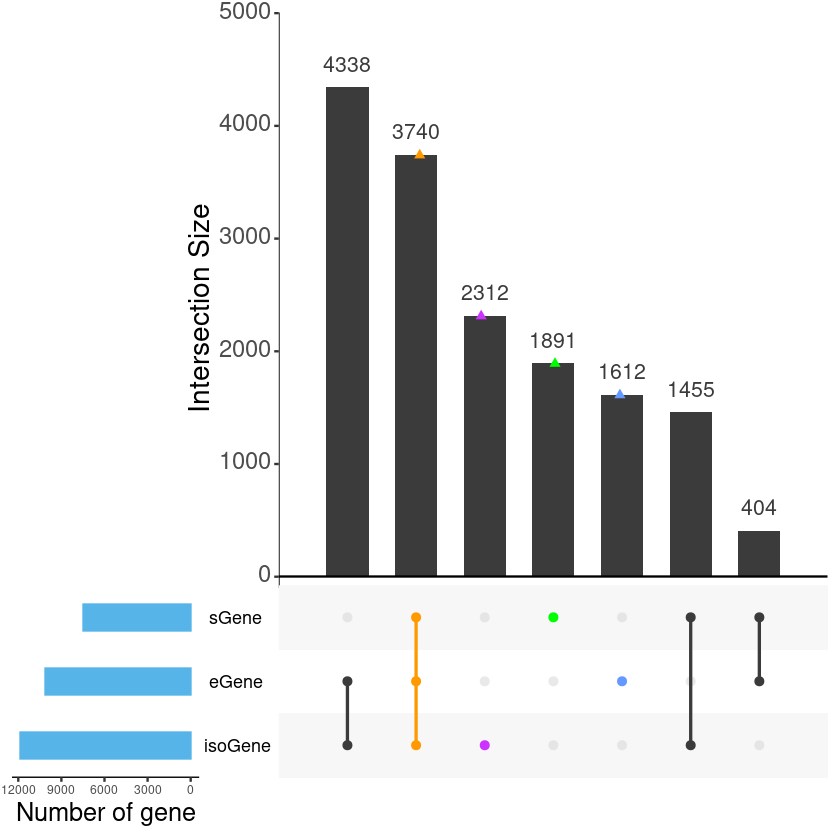

In [7]:
egenes <- unique(egene$pid)
length(egenes)
isogenes <- unique(isogene$group_id)
length(isogenes)
sgenes <- unique(sgene$ensg_id)
length(sgenes)

compare <- list(eGene = egenes, isoGene = isogenes, sGene = sgenes)

upset(fromList(compare), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of gene",
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "#FF9900", active = F),
                     list(query = intersects, params = list("eGene"),
                          color = "#6699FF", active = F),
                     list(query = intersects, params = list("isoGene"),
                          color = "#CC33FF", active = F),
                     list(query = intersects, params = list("sGene"),
                          color = "#00FF00", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [8]:
pdf(file = "sqtl_new/figures/e_iso_sgene.pdf", onefile = F, width = 6, height = 6)
upset(fromList(compare), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of gene",
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "#FF9900", active = F),
                     list(query = intersects, params = list("eGene"),
                          color = "#6699FF", active = F),
                     list(query = intersects, params = list("isoGene"),
                          color = "#CC33FF", active = F),
                     list(query = intersects, params = list("sGene"),
                          color = "#00FF00", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

### 2: Top e/iso/sQTL distance to target gene (grouped permutation)

In [9]:
egene <- egene %>% mutate(dist_kb = dist/1000)
isogene <- isogene %>% mutate(dist_kb = tss_distance/1000)
sgene <- sgene %>% mutate(dist_kb = tss_distance/1000)

In [10]:
egene_qtl <- egene %>% select(dist_kb, qval)
isogene_qtl <- isogene %>% select(dist_kb, qval)
sgene_qtl <- sgene %>% select(dist_kb, qval)

In [11]:
qtl <- rbind(egene_qtl, isogene_qtl, sgene_qtl)
qtl$group <- c(rep("cis-eQTL", nrow(egene)), 
               rep("cis-isoQTL", nrow(isogene)),
               rep("cis-sQTL", nrow(sgene)))
qtl$group <- factor(qtl$group, levels = c("cis-eQTL", "cis-isoQTL", "cis-sQTL"))

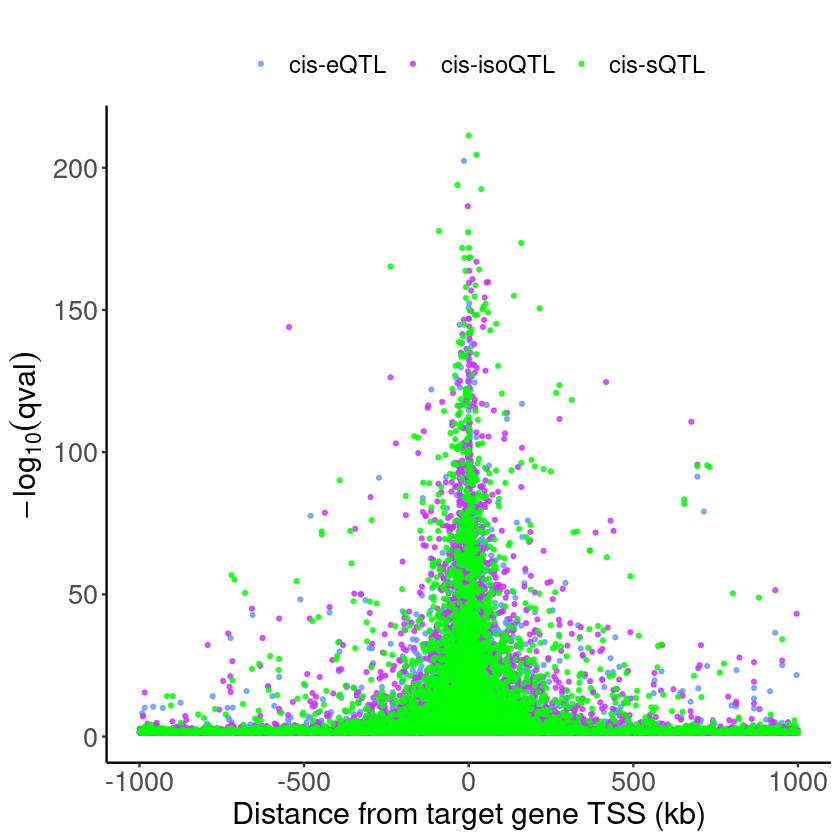

In [20]:
p <- ggplot(qtl, aes(x = dist_kb)) +
#     geom_point(data = qtl[qtl$group == "cis-sQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-isoQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-eQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
    geom_point(aes(y = -log10(qval), color = group), alpha = 0.8, size = 1.2, shape = 20) +
    labs(x = "Distance from target gene TSS (kb)",
         y = expression(-log[10](qval)),
         title = "",
         color = "") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") +
    scale_color_manual(values=c("#6699FF", "#CC33FF", "#00FF00"))
p

In [41]:
-log10(0.05)

[1] 1.30103

In [21]:
ggsave("sqtl_new/figures/e_iso_s_dist.pdf", p, width = 6, height = 6)

### 3: QTL schematic

In [22]:
aa <- rnorm(50, mean = 10, sd = 1)
at <- rnorm(50, mean = 14, sd = 1.5)
tt <- rnorm(50, mean = 18, sd = 1)
df <- data.frame("value" = c(aa, at, tt), "Genotype" = c(rep("AA", 50), rep("AT", 50), rep("TT", 50)))

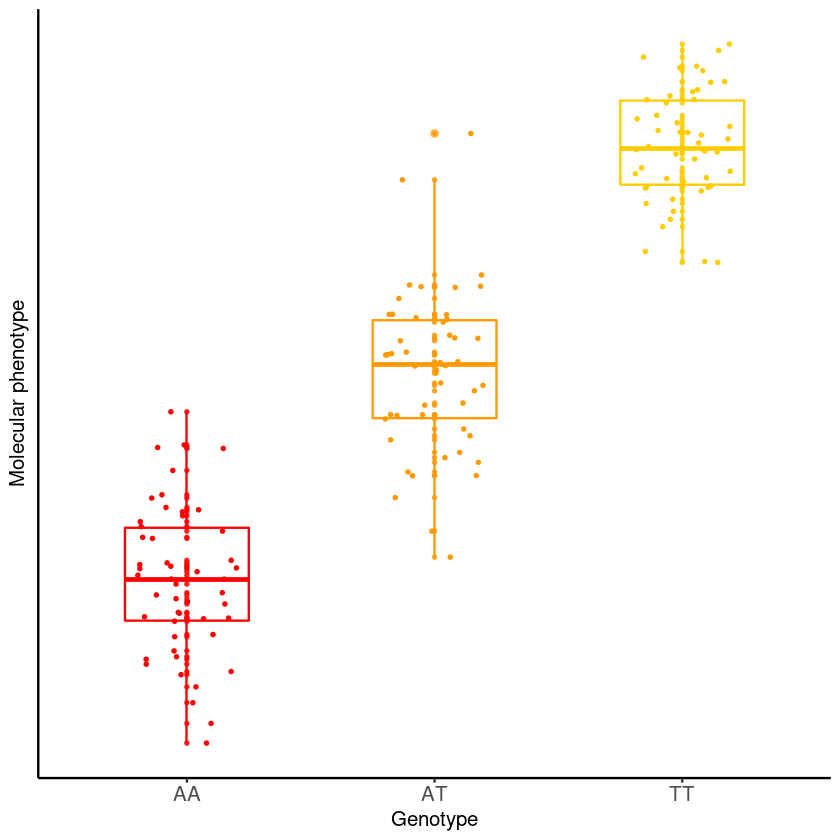

In [30]:
p <- ggplot(df, aes(x = Genotype, y = value, color = Genotype)) +
#     geom_violin(alpha = .4, trim = FALSE) +
    geom_boxplot(width = 0.5, fill = 'white', alpha = 0.5) +
    geom_point(alpha = 0.8, size = 0.5) +
    geom_jitter(width = 0.2, size = 0.5) +
    labs(x = "Genotype", y = "Molecular phenotype") + 
    theme_classic() +
    theme(axis.text = element_text(size = 12),
          axis.title = element_text(size = 12),
          legend.position = "none",
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank()) +
    scale_color_ucscgb()
p

In [31]:
ggsave("eqtl_new/figures/qtl_schematic.pdf", p, width = 2, height = 2)

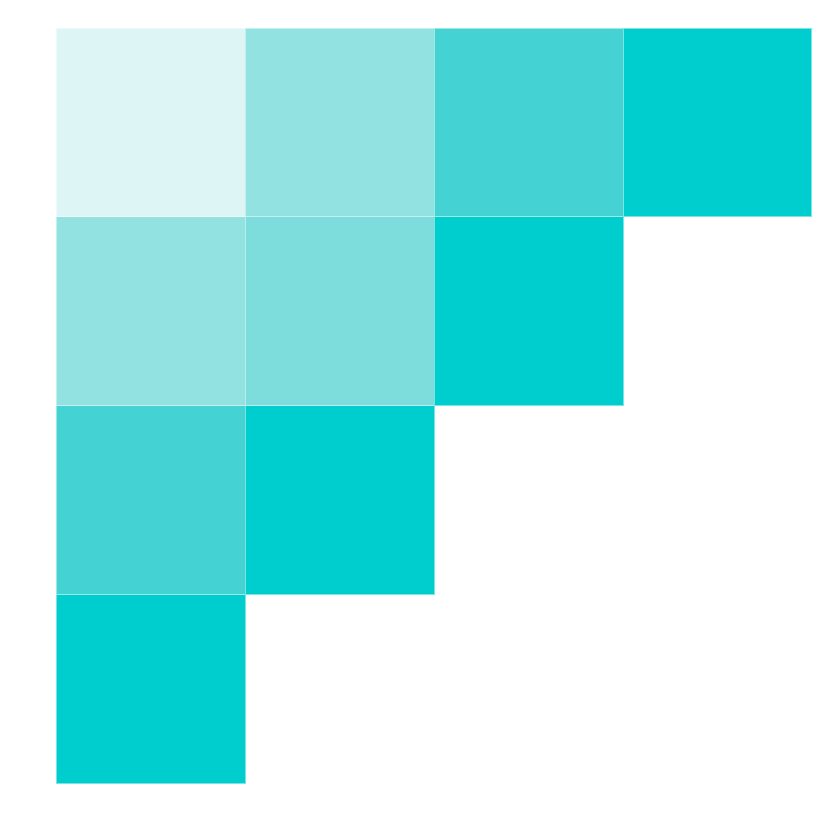

In [93]:
pop1 <- data.frame("var1" = c("a", "a", "a", "a", "b", "b", "b", "c", "c", "d"),
                   "var2" = c("a", "b", "c", "d", "b", "c", "d", "c", "d", "d"),
                   "r" = c(1, .9, .6, .2, 1, .7, .6, 1, .9, 1))
p <- ggplot(pop1, aes(x = var1, y = var2, fill = r)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "white", high = "cyan3") +
    theme_classic() +
    labs(x = "", y = "") +
    theme(legend.position = "none",
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.line=element_blank(),)
p

In [94]:
ggsave("eqtl_new/figures/ld_schematic1.pdf", p, width = 2, height = 2)

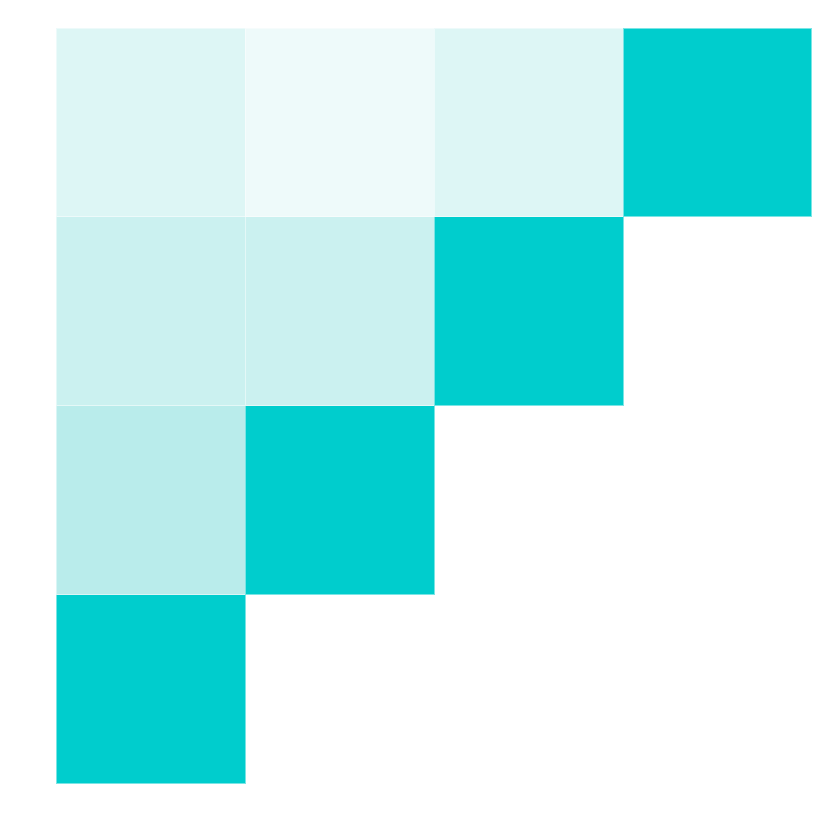

In [95]:
pop1 <- data.frame("var1" = c("a", "a", "a", "a", "b", "b", "b", "c", "c", "d"),
                   "var2" = c("a", "b", "c", "d", "b", "c", "d", "c", "d", "d"),
                   "r" = c(1, .4, .3, .2, 1, .3, .1, 1, .2, 1))
p <- ggplot(pop1, aes(x = var1, y = var2, fill = r)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "white", high = "cyan3") +
    theme_classic() +
    labs(x = "", y = "") +
    theme(legend.position = "none",
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.line=element_blank())
p

In [96]:
ggsave("eqtl_new/figures/ld_schematic2.pdf", p, width = 2, height = 2)

### 5. e/iso/sQTL genes combined+CT specific genes
- e/iso/sQTL combined: 15752 genes
- all: 17874
- 

In [3]:
eqtl <- fread("eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
egenes <- unique(eqtl$pid)

In [5]:
isoqtl <- fread("isoqtl_new/results/mixed_grp_perm_70hcp/group.perm.genes.txt.gz", data.table = F)
head(isoqtl)

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,ENST00000456328.2_1:ENSG00000223972,846,1.03391,153.810,472.615,0.000277306,chr1:935662,859173,14,14,...,1,9.17017e-05,0.0480143,0.01218360,0.0332967,0.0369681,ENSG00000223972,1,0.0379578,0.000388848
2,ENST00000473358.1_1:ENSG00000243485,882,1.01921,160.210,472.148,0.002260950,rs58879223,862458,48,50,...,1,1.01256e-03,-0.0232775,0.00704346,0.2932900,0.2953390,ENSG00000243485,1,0.1766770,0.000355642
3,ENST00000488147.1_2:ENSG00000227232,882,1.03391,164.177,481.710,0.006480150,rs74047413,845095,22,23,...,1,3.71668e-03,0.0284500,0.00976390,0.6533940,0.6419820,ENSG00000227232,1,0.2838210,0.000364301
4,ENST00000461467.1_2:ENSG00000237613,900,1.08949,141.258,445.279,0.012502100,rs74048004,981625,18,19,...,1,5.63050e-03,-0.0281826,0.01013920,0.8131600,0.8070160,ENSG00000237613,1,0.3252290,0.000503392
5,ENST00000495576.1_2:ENSG00000239945,1125,1.06696,164.354,451.342,0.014158000,rs534809610,877903,14,14,...,1,6.91359e-03,0.0336841,0.01242380,0.8913620,0.8925120,ENSG00000239945,1,0.3455850,0.000404123
6,ENST00000442987.3_1:ENSG00000233750,1334,1.02439,206.710,464.549,0.002985880,rs140316058,971632,17,17,...,1,1.27217e-03,-0.0365124,0.01127260,0.4619290,0.4492090,ENSG00000233750,1,0.2291940,0.000280446


In [6]:
isoqtl.sig <- isoqtl %>% filter(qval < 0.05)
isogene <- unique(isoqtl.sig$group_id)

In [7]:
length(isogene)

[1] 11845

In [9]:
test <- fread("isoqtl_new/results/mixed_perm_70hcp/sig_pheno_gene.txt", data.table = F)
head(test)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,Gene
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENST00000002165.11_3,5683,1.04270,863.673,478.732,rs4896658,-47658,1.04606e-17,-0.814467,0.00009999,2.84572e-13,3.88533e-12,2.30536e-05,ENSG00000001036
2,ENST00000002501.11_2,4247,1.08405,461.862,450.821,rs78536691,14607,8.12818e-07,-0.476499,0.00159984,2.08651e-03,8.58905e-03,5.10417e-05,ENSG00000003249
3,ENST00000002596.6_3,7427,1.04532,878.552,477.103,rs57203756,256802,2.62013e-06,-0.696909,0.00759924,7.96587e-03,2.76269e-02,2.29153e-05,ENSG00000002587
4,ENST00000003100.13_4,4221,1.01913,520.765,479.814,rs34040612,35125,3.26734e-15,-0.201914,0.00009999,5.24469e-11,5.89738e-10,3.45304e-05,ENSG00000001630
5,ENST00000003302.8_2,5184,1.04422,804.917,483.553,rs7126080,-21619,2.00629e-09,0.231246,0.00009999,8.26057e-06,5.23915e-05,2.48958e-05,ENSG00000048028
6,ENST00000003583.12_2,5651,1.05037,809.344,475.954,rs11578878,-9278,3.09987e-34,0.523475,0.00009999,1.96434e-28,7.14212e-27,2.54073e-05,ENSG00000001460


In [11]:
test.gene <- unique(test$Gene)
length(test.gene)
sum(test.gene%in%isogene)

[1] 11468

[1] 10799

In [34]:
sqtl <- fread("sqtl_new/results/mixed_grp_perm_40hcp_1e6/group.perm.genes.txt.gz", data.table = F)
head(sqtl)

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,1:16310:16607:clu_7638_NA:ENSG00000227232.5_3:WASH7P,882,1.022960,3712.170,526.951,5.90366e-05,rs115208257,756453,22,22,...,1,2.10030e-05,0.0405323,0.00945126,0.18530200,0.187963000,ENSG00000227232.5_3,26,0.11609600,1.87719e-05
2,1:164791:165884:clu_7642_NA:ENSG00000238009.6_9:AL627309.1,1348,0.988039,1191.960,528.668,2.00498e-03,chr1:911163,712820,95,105,...,1,1.08803e-03,-0.0147878,0.00450449,0.91582800,0.910494000,ENSG00000238009.6_9,5,0.33305400,5.21862e-05
3,1:165942:167959:clu_7644_NA:ENSG00000241860.7_7:AL627309.5,1577,1.053680,2169.920,517.861,1.83813e-03,rs12565032,606367,42,43,...,1,8.74303e-04,0.0222408,0.00664854,0.97658500,0.979312000,ENSG00000241860.7_7,8,0.34993900,3.52965e-05
4,1:700627:701709:clu_7646_NA:ENSG00000228463.4:AP006222.2,1902,1.038170,579.717,517.630,2.01602e-03,rs115979567,612323,15,15,...,1,9.68055e-04,0.0374274,0.01128580,0.68327600,0.674551000,ENSG00000228463.4,2,0.27608500,1.26028e-04
5,1:744003:744111:clu_7663_NA:ENSG00000228327.3_7:AL669831.1,3081,1.013770,36858.300,550.210,3.75292e-08,rs116091741,108375,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00049995,0.001255080,ENSG00000228327.3_7,55,0.00148078,1.83616e-06
6,1:744003:744111:clu_7663_NA:ENSG00000230092.7_6:AL669831.4,3124,1.031500,10364.900,532.001,6.29523e-08,rs116091741,69289,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00039996,0.000510724,ENSG00000230092.7_6,20,0.00063733,6.90549e-06


In [35]:
sqtl <- sqtl %>% separate(group_id, c("ensg", "version"), sep = "[.]", remove = FALSE)
head(sqtl)
sqtl.sig <- sqtl %>% filter(qval < 0.05)
length(unique(sqtl.sig$group_id))
length(unique(sqtl.sig$ensg))

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,slope,slope_se,pval_perm,pval_beta,group_id,ensg,version,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1:16310:16607:clu_7638_NA:ENSG00000227232.5_3:WASH7P,882,1.022960,3712.170,526.951,5.90366e-05,rs115208257,756453,22,22,...,0.0405323,0.00945126,0.18530200,0.187963000,ENSG00000227232.5_3,ENSG00000227232,5_3,26,0.11609600,1.87719e-05
2,1:164791:165884:clu_7642_NA:ENSG00000238009.6_9:AL627309.1,1348,0.988039,1191.960,528.668,2.00498e-03,chr1:911163,712820,95,105,...,-0.0147878,0.00450449,0.91582800,0.910494000,ENSG00000238009.6_9,ENSG00000238009,6_9,5,0.33305400,5.21862e-05
3,1:165942:167959:clu_7644_NA:ENSG00000241860.7_7:AL627309.5,1577,1.053680,2169.920,517.861,1.83813e-03,rs12565032,606367,42,43,...,0.0222408,0.00664854,0.97658500,0.979312000,ENSG00000241860.7_7,ENSG00000241860,7_7,8,0.34993900,3.52965e-05
4,1:700627:701709:clu_7646_NA:ENSG00000228463.4:AP006222.2,1902,1.038170,579.717,517.630,2.01602e-03,rs115979567,612323,15,15,...,0.0374274,0.01128580,0.68327600,0.674551000,ENSG00000228463.4,ENSG00000228463,4,2,0.27608500,1.26028e-04
5,1:744003:744111:clu_7663_NA:ENSG00000228327.3_7:AL669831.1,3081,1.013770,36858.300,550.210,3.75292e-08,rs116091741,108375,26,27,...,-0.0478115,0.00826555,0.00049995,0.001255080,ENSG00000228327.3_7,ENSG00000228327,3_7,55,0.00148078,1.83616e-06
6,1:744003:744111:clu_7663_NA:ENSG00000230092.7_6:AL669831.4,3124,1.031500,10364.900,532.001,6.29523e-08,rs116091741,69289,26,27,...,-0.0478115,0.00826555,0.00039996,0.000510724,ENSG00000230092.7_6,ENSG00000230092,7_6,20,0.00063733,6.90549e-06


[1] 7490

[1] 7490

In [46]:
sgene <- unique(sqtl.sig$ensg)
length(sgene)

[1] 7490

In [13]:
ex_egene <- unique(fread("eqtl_new/results/ex_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
end_egene <- unique(fread("eqtl_new/results/end_perm_100hcp/sig_pheno.txt", data.table = F)$pid)
in_egene <- unique(fread("eqtl_new/results/in_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
ip_egene <- unique(fread("eqtl_new/results/ip_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
mic_egene <- unique(fread("eqtl_new/results/mic_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
per_egene <- unique(fread("eqtl_new/results/per_perm_70hcp/sig_pheno.txt", data.table = F)$pid)
opc_egene <- unique(fread("eqtl_new/results/opc_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
pg_egene <- unique(fread("eqtl_new/results/pg_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
rg_egene <- unique(fread("eqtl_new/results/rg_perm_100hcp/sig_pheno.txt", data.table = F)$pid)

In [47]:
combined <- list(e=egenes, iso=isogene, s=sgene, ex=ex_egene, end=end_egene, in_gene=in_egene, 
               ip=ip_egene, mic=mic_egene, per=per_egene, opc=opc_egene, pg=pg_egene, rg=rg_egene)

# upset(fromList(compare), order.by = "freq")

In [48]:
combined <- unlist(combined)

In [49]:
length(combined)

[1] 82226

In [50]:
length(unique(combined))

[1] 17847

In [51]:
e_iso_s <- unique(c(egenes, isogene, sgene))
length(e_iso_s)

[1] 15752

In [43]:
head(egenes)

[1] "ENSG00000000419" "ENSG00000000460" "ENSG00000001036" "ENSG00000001460"
[5] "ENSG00000001461" "ENSG00000001561"

In [44]:
head(isogene)

[1] "ENSG00000223972" "ENSG00000238009" "ENSG00000225972" "ENSG00000225630"
[5] "ENSG00000237973" "ENSG00000248527"

In [45]:
head(sgene)

[1] "ENSG00000228327.3_7"  "ENSG00000230092.7_6"  "ENSG00000228794.10_7"
[4] "ENSG00000272438.1_7"  "ENSG00000230699.2_7"  "ENSG00000188976.11_4"

In [53]:
(17847-15752)/17874

[1] 0.1172094

In [54]:
17847-15752

[1] 2095

In [55]:
15752/17847

[1] 0.8826133